> ### Import packages


In [0]:
!pip install scikit-plot
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from bs4 import BeautifulSoup
import re
import pandas as pd
import re
import os
import nltk
from sklearn.linear_model import LogisticRegression
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB as mnb
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import scikitplot as skplt

In [0]:
import pandas as pd

from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


> ### Read the preprocessed data

In [0]:
data = pd.read_csv('drive/My Drive/Colab Notebooks/preprocessed.csv')

> ### Preprocess data has mixed language such as Hindi and English

In [0]:
data.head()

,Unnamed: 0,favour,against,sentements,data,isPolitical,user,language,Hindi,Political
0,1,[],[],"[""Offensive""]",इस औरत के दिमाग के आगे तो लुटेरे भी फैल हो गये।,False,anshuman,Hindi,इस औरत के दिमाग के आगे तो लुटेरे भी फैल हो गये,0
1,3,[],[],"[""Spam"",""Offensive""]",*O. M. G full HD sex*\n \n\n*WATCH LIVE BOOBS*...,False,anshuman,Hindi,के बाहर कीया सेक्स देखिए videosFADU,0
2,5,[],[],"[""Others""]",सूत्रों के मुताबिक भारतीय वायुसेना ने पहले करी...,False,anshuman,Hindi,सूत्रों के मुताबिक भारतीय वायुसेना ने पहले करी...,0
3,6,[],[],"[""Offensive""]",कहाँ से इनको पकड़ा है भाई तुम लोगो ने,False,anshuman,Hindi,कहाँ से इनको पकड़ा है भाई तुम लोगो ने,0
4,8,[],[],"[""Others""]","पुलवामा: झड़प में 8 पत्थरबाजों की मौत, 9 की हा...",True,anshuman,Hindi,पुलवामा झड़प में पत्थरबाजों की मौत की हालत गंभ...,1


In [0]:
data['Hindi'].values[0]

'इस औरत के दिमाग के आगे तो लुटेरे भी फैल हो गये'

> ### Split the data into train and test in the 80:20 ratio 

In [0]:
X_train, X_test, y_train, y_test = train_test_split(data['Hindi'], data['Political'], test_size=0.20, random_state=42)

In [0]:
tfidf1 = TfidfVectorizer(max_features = 675)  ## we experimented with different features
X_train1 = tfidf1.fit_transform(X_train)
X_test1 = tfidf1.transform(X_test)

> ### Fine tune alpha value for two classes (Political, non-political )

In [0]:
for i in [.0001,.001,.01,.1,1,10,100,1000]:
    gnb = mnb(alpha = i)
    gnb.fit(X_train1,y_train)
    y_pre = gnb.predict(X_test1)
    print(i,"Accuracy of the model :",accuracy_score(y_test,y_pre))

0.0001 Accuracy of the model : 0.6507462686567164
0.001 Accuracy of the model : 0.6507462686567164
0.01 Accuracy of the model : 0.6537313432835821
0.1 Accuracy of the model : 0.6537313432835821
1 Accuracy of the model : 0.6507462686567164
10 Accuracy of the model : 0.6059701492537314
100 Accuracy of the model : 0.591044776119403
1000 Accuracy of the model : 0.591044776119403


> ### Confusion metrix  0 means political, 1 means non-political

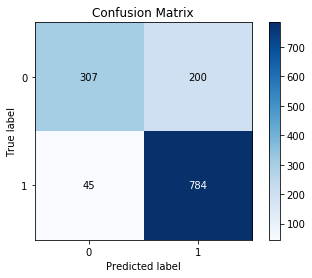

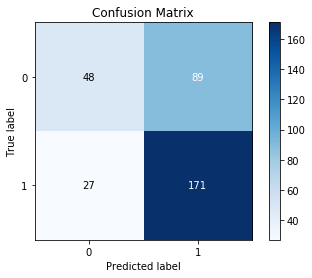

In [0]:
gnb = mnb(alpha=.1)
gnb.fit(X_train1,y_train)
y_pre1 = gnb.predict(X_train1)
y_pre = gnb.predict(X_test1)
skplt.metrics.plot_confusion_matrix(y_train,y_pre1)
skplt.metrics.plot_confusion_matrix(y_test,y_pre)

In [0]:
print("Accuracy of the model on test data:",accuracy_score(y_test,y_pre))
print("Accuracy of the model on training data :",accuracy_score(y_train,y_pre1))

Accuracy of the model on test data: 0.6537313432835821
Accuracy of the model on training data : 0.8166167664670658


> ### Changing the decsion surface by changing the probability values

In [0]:
gnb = mnb(alpha=.1)
gnb.fit(X_train1,y_train)
y_pre1 = gnb.predict_proba(X_train1)
y_pre = gnb.predict_proba(X_test1)

In [0]:
def cal_acc(test,k):
    predict_val = []
   # print(test)
    for d in test:
            if d[0]>k:
                predict_val.append(0)
            else:
                predict_val.append(1)
    return predict_val             

In [0]:
for k in [.025,.05,.1,.2,.3,.4,.5,.6,.7,.8,.9,.99]:
    predict1 = cal_acc(y_pre,k)
    predict2 = cal_acc(y_pre1,k)
    print("==="*15)
    print(k,"Test Accuracy score of the model :",accuracy_score(y_test,predict1))
    print("Train Accuracy score of the model :",accuracy_score(y_train,predict2))

0.025 Test Accuracy score of the model : 0.41492537313432837
Train Accuracy score of the model : 0.39221556886227543
0.05 Test Accuracy score of the model : 0.4208955223880597
Train Accuracy score of the model : 0.4341317365269461
0.1 Test Accuracy score of the model : 0.4746268656716418
Train Accuracy score of the model : 0.5202095808383234
0.2 Test Accuracy score of the model : 0.5701492537313433
Train Accuracy score of the model : 0.6721556886227545
0.3 Test Accuracy score of the model : 0.6388059701492538
Train Accuracy score of the model : 0.7776946107784432
0.4 Test Accuracy score of the model : 0.6477611940298508
Train Accuracy score of the model : 0.813622754491018
0.5 Test Accuracy score of the model : 0.6537313432835821
Train Accuracy score of the model : 0.8166167664670658
0.6 Test Accuracy score of the model : 0.6477611940298508
Train Accuracy score of the model : 0.7732035928143712
0.7 Test Accuracy score of the model : 0.6388059701492538
Train Accuracy score of the model 

In [0]:
pos_class_prob_sorted = gnb.feature_log_prob_[1, :].argsort()
feature = tfidf1.get_feature_names()

In [0]:
feat_count = gnb.feature_count_
feat_count.shape

(2, 675)

In [0]:
log_prob = gnb.feature_log_prob_
feature_prob = pd.DataFrame(log_prob, columns = feature)
feature_prob_tr = feature_prob.T
feature_prob_tr.shape

(675, 2)

In [0]:
print("\n\n Top 10 Positive Features from Political Class:-\n",feature_prob_tr[1].sort_values(ascending = False)[0:10])



 Top 10 Positive Features from Political Class:-
 कर   -3.912480
नह   -4.036505
रह   -4.091825
पर   -4.249819
और   -4.288621
एक   -4.574319
बन   -4.581853
रत   -4.624207
कह   -4.633193
हम   -4.769047
Name: 1, dtype: float64


In [0]:
print("Top 10 Negative Features From the Non-Political Class:-\n",feature_prob_tr[0].sort_values(ascending = False)[0:10])

Top 10 Negative Features From the Non-Political Class:-
 कर    -3.707110
नह    -4.059005
पर    -4.182728
और    -4.206801
जय    -4.212360
रह    -4.241120
रत    -4.260654
इस    -4.288910
आपक   -4.527497
जर    -4.634624
Name: 0, dtype: float64


### Applying logistic Regression

> ### When all the classes are not balanced

In [0]:
for i in [.000001,.00001,.0001,.001,.01,.1,1,10,100,1000]:
    gnb = LogisticRegression(penalty='l2',C = i)
    gnb.fit(X_train1,y_train)
    y_pre = gnb.predict(X_test1)
    print(i,"Accuracy of the model :",accuracy_score(y_test,y_pre))

1e-06 Accuracy of the model : 0.591044776119403
1e-05 Accuracy of the model : 0.591044776119403
0.0001 Accuracy of the model : 0.591044776119403
0.001 Accuracy of the model : 0.591044776119403
0.01 Accuracy of the model : 0.591044776119403
0.1 Accuracy of the model : 0.591044776119403
1 Accuracy of the model : 0.6716417910447762
10 Accuracy of the model : 0.6626865671641791
100 Accuracy of the model : 0.6208955223880597
1000 Accuracy of the model : 0.6298507462686567


> ### When all the classes are balanced

In [0]:
for i in [.000001,.00001,.0001,.001,.01,.1,1,10,100,1000]:
    gnb = LogisticRegression(penalty='l2',C = i,class_weight ='balanced')
    gnb.fit(X_train1,y_train)
    y_pre = gnb.predict(X_test1)
    print(i,"Accuracy of the model :",accuracy_score(y_test,y_pre))

1e-06 Accuracy of the model : 0.6925373134328359
1e-05 Accuracy of the model : 0.6925373134328359
0.0001 Accuracy of the model : 0.6985074626865672
0.001 Accuracy of the model : 0.6895522388059702
0.01 Accuracy of the model : 0.6985074626865672
0.1 Accuracy of the model : 0.6925373134328359
1 Accuracy of the model : 0.6805970149253732
10 Accuracy of the model : 0.6597014925373135
100 Accuracy of the model : 0.6059701492537314
1000 Accuracy of the model : 0.6119402985074627


In [0]:
gnb = LogisticRegression(penalty='l2',C = .0001,class_weight ='balanced')
gnb.fit(X_train1,y_train)
y_pre = gnb.predict(X_test1)
y_pre1 = gnb.predict(X_train1)
print("Accuracy of the model on test data :",accuracy_score(y_test,y_pre))
print("Accuracy of the model on train data :",accuracy_score(y_train,y_pre1))

Accuracy of the model on test data : 0.6985074626865672
Accuracy of the model on train data : 0.7462574850299402


Confusion matrix for training data: 
Confusion matrix for test data :


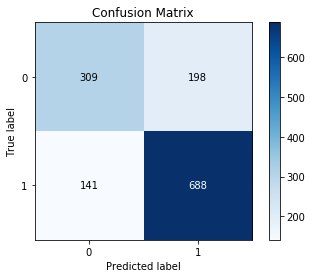

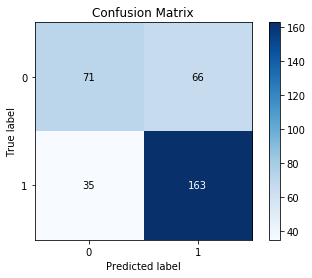

In [0]:
print("Confusion matrix for training data: ")
skplt.metrics.plot_confusion_matrix(y_train,y_pre1)
print("Confusion matrix for test data :")
skplt.metrics.plot_confusion_matrix(y_test,y_pre)


In [0]:

feature_names=tfidf1.get_feature_names()
w=gnb.coef_
top_f=zip(w[0],feature_names)
top_new=list(top_f)
top_new.sort(reverse=True,key=lambda x:x[0])
print('Weight\t\tTop Positive Feature')
for i in range (1,20):
    print("%.2f\t\t"%top_new[i][0],top_new[i][1])

Weight		Top Positive Feature
0.00		 सरक
0.00		 तक
0.00		 पप
0.00		 रह
0.00		 धन
0.00		 एक
0.00		 सम
0.00		 नर
0.00		 कहत
0.00		 कम
0.00		 नम
0.00		 जन
0.00		 अब
0.00		 बन
0.00		 पत
0.00		 गठब
0.00		 कह
0.00		 एम
0.00		 चल


## Changing the probability values for the decision

In [0]:
gnb = LogisticRegression(penalty='l2',C = .0001,class_weight ='balanced')
gnb.fit(X_train1,y_train)
y_pre = gnb.predict_proba(X_test1)
y_pre1 = gnb.predict_proba(X_train1)

In [0]:
for k in [.025,.05,.1,.2,.3,.4,.5,.6,.7,.8,.9,.99]:
    predict1 = cal_acc(y_pre,k)
    predict2 = cal_acc(y_pre1,k)
    print("==="*15)
    print(k,"Test Accuracy score of the model :",accuracy_score(y_test,predict1))
    print("Train Accuracy score of the model :",accuracy_score(y_train,predict2))

0.025 Test Accuracy score of the model : 0.408955223880597
Train Accuracy score of the model : 0.37949101796407186
0.05 Test Accuracy score of the model : 0.408955223880597
Train Accuracy score of the model : 0.37949101796407186
0.1 Test Accuracy score of the model : 0.408955223880597
Train Accuracy score of the model : 0.37949101796407186
0.2 Test Accuracy score of the model : 0.408955223880597
Train Accuracy score of the model : 0.37949101796407186
0.3 Test Accuracy score of the model : 0.408955223880597
Train Accuracy score of the model : 0.37949101796407186
0.4 Test Accuracy score of the model : 0.408955223880597
Train Accuracy score of the model : 0.37949101796407186
0.5 Test Accuracy score of the model : 0.6985074626865672
Train Accuracy score of the model : 0.7462574850299402
0.6 Test Accuracy score of the model : 0.591044776119403
Train Accuracy score of the model : 0.6205089820359282
0.7 Test Accuracy score of the model : 0.591044776119403
Train Accuracy score of the model : 0